# Plotting for Exploratory data analysis (EDA)

## Haberman Cancer Survival dataset


*  Objective: To determine the status of new cancer Patients is he/she survived in five year or died with help of the age of the patient (age), Year of operation(year) and number of positive axillary nodes (nodes).


# Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

habarman = pd.read_csv("haberman.csv")
#habarman


In [2]:
# How many data point in dataset?
habarman.shape
print ("Number of data points are", habarman.shape[0])
# Total 306 poins

Number of data points are 306


In [3]:
# How many number of features?
print ("Number of features", habarman.shape[1])

Number of features 4


In [4]:
# What are the features ?
habarman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
# What are the unique classes ?
print (habarman.status.unique())
# Two unique classes 1 and 2

[1 2]


In [6]:
# Haw many uniques classe ?
print (len(habarman.status.unique()))

2


In [7]:
# How many belong to data-points each class?
print (habarman.status.value_counts())
# In class 1- 225 data points.
# In class 2- 81 data points.
# Total 306 data points.


1    225
2     81
Name: status, dtype: int64


In [8]:
# Percent of data poins in each class.
print ("Percentage of class 1: ",habarman.status.value_counts()[1]/habarman.shape[0] *100,"%")
print ("Percentage of class 2: ",habarman.status.value_counts()[2]/habarman.shape[0] *100,"%")


Percentage of class 1:  73.5294117647 %
Percentage of class 2:  26.4705882353 %


###### High level statistics of the dataset: number of points: 306, number of features: 4, number of classes: 2 , data-points per class: class 1: 225 and class 2: 81.
##### Objective : To determine the status of  new cancer Patients with help of the age of the patient (age), Year of operation(year) and number of positive axillary nodes (nodes). If status is 1 then patient survived 5 or longer years. If status is 2 then patient died with in 5 years.

## 2-D Scatter Plot

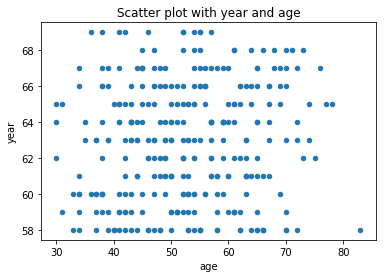

In [9]:
# 2-D Scatter plot with age on x -axis and year on y-axis 

habarman.plot(kind='scatter', x='age', y='year')
plt.title('Scatter plot with year and age')
plt.show()

Min age is 30 and max age is 82
Years between 58 to 68

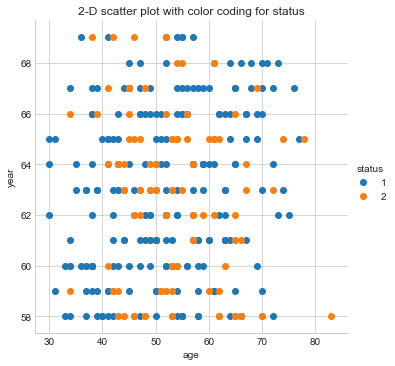

In [10]:
# 2-D scatter plot with color coding for status/class.

sns.set_style("whitegrid")
sns.FacetGrid(habarman, hue='status', size= 5)\
    .map(plt.scatter, "age", "year")\
    .add_legend()
plt.title('2-D scatter plot with color coding for status')
plt.show()

# Notic that blue and yellow points cannot easily seperated.



 Classes are not seprated with age and year feature
 Year and age are not related to status.

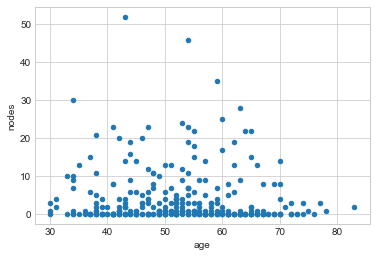

In [11]:
# 2D scatter plot:
# Age on x-axis and nodes on y-axis

habarman.plot(kind= "scatter", x='age', y='nodes')
plt.show()


Nodes whose values are dense in 0 to 10 points where more points are present.
Nodes values range is min 0 to 50 range.

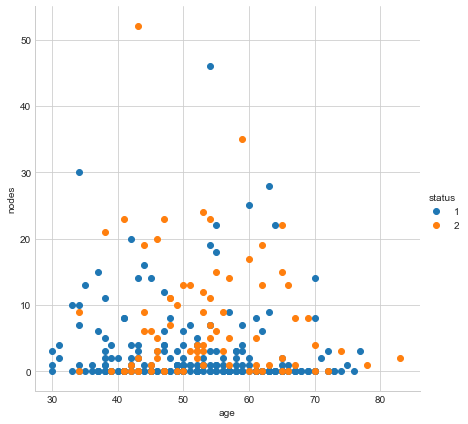

In [12]:
sns.set_style("whitegrid")
sns.FacetGrid(habarman, hue="status", size= 6)\
    .map(plt.scatter, "age", "nodes")\
    .add_legend()
plt.show()

The class/status with label 1 are more in 0 to 3 nodes range.
If the age is less than 40 then more people have status is 1.
But the classes are not well separated with age and node features.
Cannot seperate blue points from orange points.

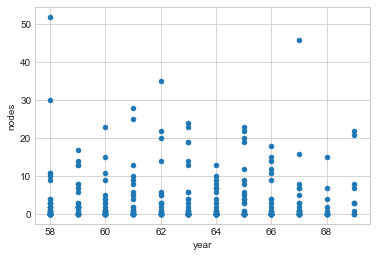

In [13]:
habarman.plot(kind="scatter", x='year', y='nodes')
plt.show()

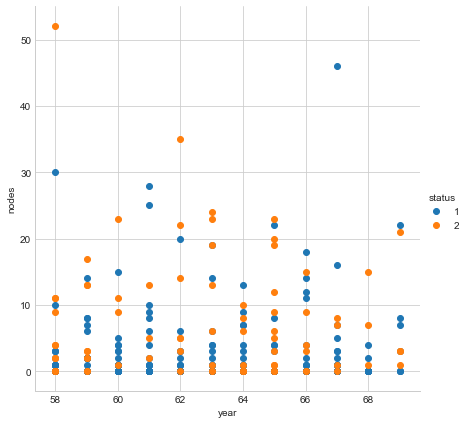

In [14]:
sns.set_style("whitegrid")
sns.FacetGrid(habarman, hue="status", size= 6)\
  .map(plt.scatter, "year", "nodes")\
  .add_legend()
plt.show()

In [15]:
# Ponts are overlap.
# Year and nodes are  related feature.
# Can not draw line to seperate blue point from orange point. 

## Pair-Plot

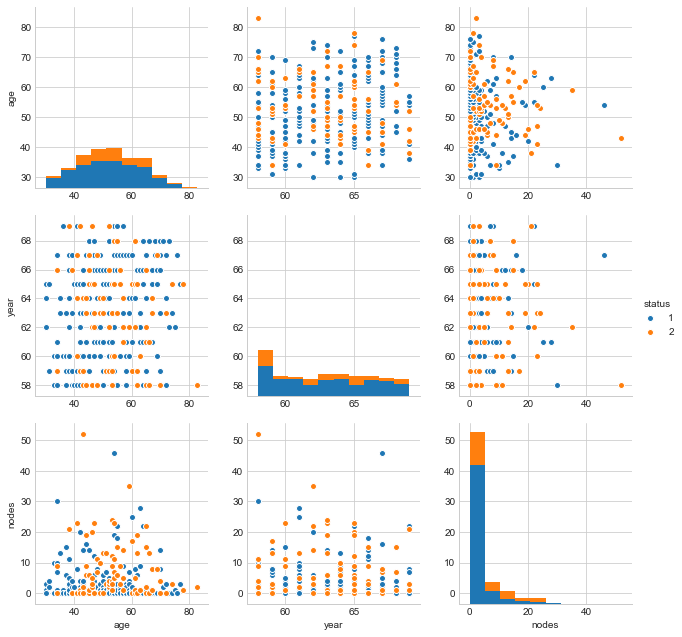

In [16]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# Pair wise scatter plot.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(habarman, hue="status", vars=["age", "year", "nodes"], size=3);
plt.show()



###### Observations

There is no useful pair of features to identify the status of the patient. 
The points are not well seperated with given pair of features.
I can not find "Lines" and "if-else" condition to build a classify status.

** Why there are more plot than 3C2?**

### 1-D scatter plot

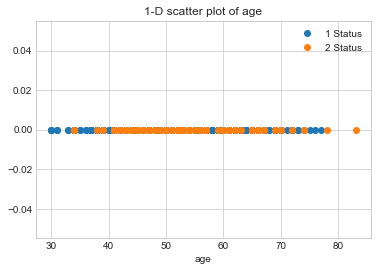

In [17]:
# What about 1-D scatter plot using just one feature?

import numpy as np
class_one = habarman.loc[habarman["status"] == 1]
class_two = habarman.loc[habarman["status"] == 2]

#1-D scatter plot of age
plt.plot(class_one["age"], np.zeros(len(class_one['age'])), 'o')
plt.plot(class_two["age"], np.zeros_like(class_two['age']), 'o')
plt.xlabel("age")
plt.title("1-D scatter plot of age")
plt.legend(['1 Status', '2 Status'])
plt.show()




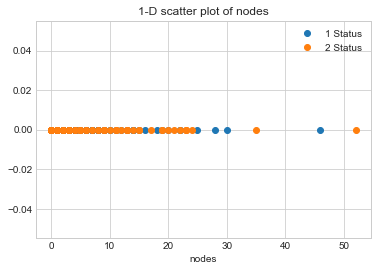

In [25]:


#1-D scatter plot of nodes
plt.plot(class_one["nodes"], np.zeros_like(class_one['nodes']), 'o')
plt.plot(class_two["nodes"], np.zeros_like(class_two['nodes']), 'o')
plt.xlabel("nodes")
plt.legend(['1 Status', '2 Status'])
plt.title("1-D scatter plot of nodes")
plt.show()



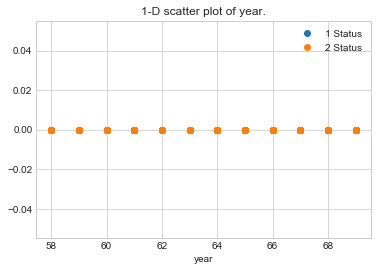

In [26]:
#1-D scatter plot of year

plt.plot(class_one["year"], np.zeros(len(class_one['year'])), 'o')
plt.plot(class_two["year"], np.zeros_like(class_two['year']), 'o')
plt.xlabel("year")
plt.legend(['1 Status', '2 Status'])
plt.title("1-D scatter plot of year.")
plt.show()

**Oberservation** 
 By taking any feature I can not differentiate status because status 1 and status 2 points are not well seperated.

### Histogram

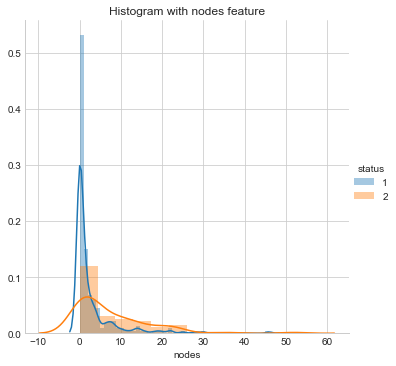

In [31]:
# Histogram with nodes feature.
# PDF # data point with perticular feature
sns.FacetGrid(habarman, hue= "status", size= 5)\
    .map(sns.distplot, "nodes")\
    .add_legend()
plt.title("Histogram with nodes feature")
plt.show()

In this plots status are not well separated they are overlap with each other. 
Value with node 0 is more offen found in given dataset.
Nodes  are absent(0) in many people most of them are in class 1.
As nodes count increase the people are beloging to class 2 are more compare to class 1.


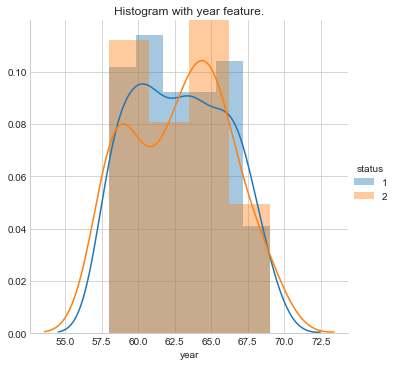

In [32]:
# Histogram of year feature
sns.FacetGrid(habarman, hue= "status", size= 5)\
    .map(sns.distplot, "year")\
    .add_legend()
plt.title("Histogram with year feature.")
plt.show()

This two classes have massive overlap no separation of classes so this feature are not usefull for this classification.

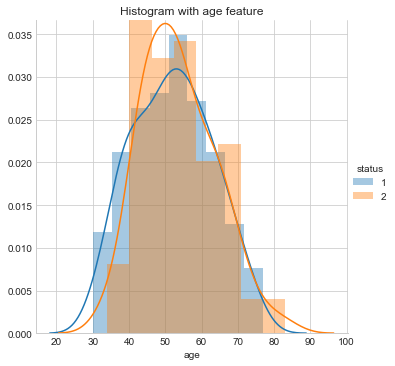

In [33]:
# Histogram with age feature
sns.FacetGrid(habarman, hue= "status", size= 5)\
    .map(sns.distplot, "age")\
    .add_legend()
plt.title("Histogram with age feature")
plt.show()

In this graph also no separation of class so only this feature is not usefull to classify status.   
Intersection of classes is more.


**Distribution **: It describes values in  the dataset and how many times each value appear appear in the dataset.   
**Histogram**: Most common way to represent the distribution is the histogram. 
Histogram is a graph which shows the frequency of each value.


### PDF and CDF
PDF : How many times value is occure in the dataset.    
    CDF : Cumulative sum of the PDF.

[ 0.14831574  0.0188537   0.01131222  0.00502765  0.00565611  0.00125691
  0.00062846  0.          0.00062846  0.00062846]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


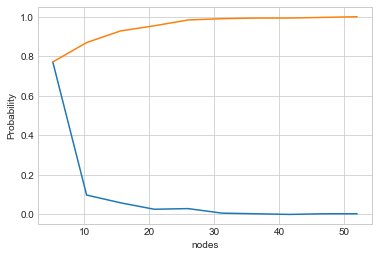

In [22]:
# PDF and CDF with nodes feature.


counts, bins_eges = np.histogram(habarman['nodes'], bins=10, density=True)
print (counts)
print (bins_eges)
pdf = counts/ np.sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bins_eges[1:], pdf)
plt.plot(bins_eges[1:], cdf)
plt.xlabel("nodes")
plt.ylabel("Probability")

plt.show()


80% people nodes values is absent i.e values is 0 in the dataset.

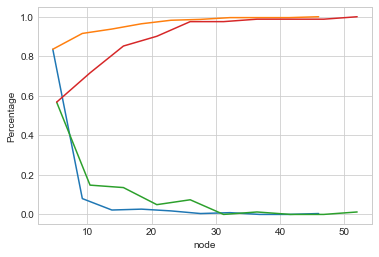

In [34]:

counts, bins_eges = np.histogram(class_one["nodes"], bins= 10, density=True)
pdf = counts/np.sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bins_eges[1:], pdf)
plt.plot(bins_eges[1:], cdf)
plt.xlabel("node")
plt.ylabel("Percentage")

counts, bins_eges = np.histogram( class_two["nodes"], bins = 10, density= True)
pdf = counts/np.sum(counts)

cdf = np.cumsum(pdf)

plt.plot(bins_eges[1:], pdf)
plt.plot(bins_eges[1:], cdf)
plt.legend()

plt.show()


 "Nodes" features is not useful to classification.
The graph are not well seperated.
If the nodes value is less then the probabilty of biloging to class one is more.

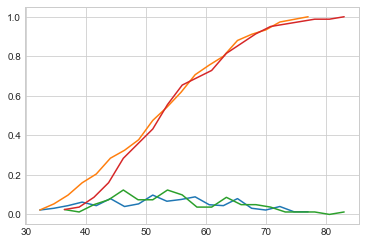

In [34]:
# PDF and CDF with age feature
counts, bins_eges = np.histogram(class_one["age"], bins= 20, density=True)
pdf = counts/np.sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bins_eges[1:], pdf)
plt.plot(bins_eges[1:], cdf)

counts, bins_eges = np.histogram( class_two["age"], bins = 20, density= True)
pdf = counts/np.sum(counts)

cdf = np.cumsum(pdf)

plt.plot(bins_eges[1:], pdf)
plt.plot(bins_eges[1:], cdf)


plt.show()

Age feature is not useful to identify the status of the patient
These graphs are not well seperated.
If the age is less then more persons belon to class 1.

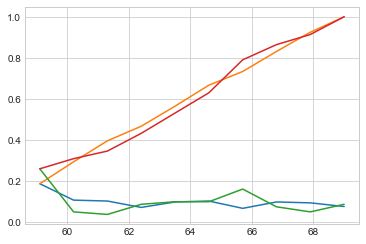

In [35]:
# PDF and CDF on year data
counts, bins_eges = np.histogram(class_one["year"], bins=10, density=True)
pdf = counts/np.sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bins_eges[1:], pdf)
plt.plot(bins_eges[1:], cdf)

counts, bins_eges = np.histogram( class_two["year"], bins = 10, density= True)
pdf = counts/np.sum(counts)

cdf = np.cumsum(pdf)

plt.plot(bins_eges[1:], pdf)
plt.plot(bins_eges[1:], cdf)


plt.show()

Year feature is not useful to identify the status of the patient
 These graphs are not well seperated.
 It show linear growth.

### Mean, Variance and Std-dev

In [45]:
# Mean value for age, std- deviation
print ("Mean values for age")
print (np.mean(class_one["age"]))
print (np.mean(class_two["age"]))

print ("Variance")
print (np.var(class_one["age"]))
print (np.var(class_two["age"]))
       
print ("Std - Deviation") # Variation Mean
print (np.std(class_one["age"]))
print (np.std(class_two["age"]))
       

Mean values for age
52.01777777777778
53.67901234567901
Variance
120.72857283950623
102.09449778997102
Std - Deviation
10.98765547510051
10.10418219303131


Average of class1 is 52 and std deviation is 11.
Average of class1 is 53 and std deviation is 10.

In [46]:
print ("Mean values for age")
print (np.mean(class_one["nodes"]))
print (np.mean(class_two["nodes"]))

print ("Variance")
print (np.var(class_one["nodes"]))
print (np.var(class_two["nodes"]))
       
print ("Std - Deviation")
print (np.std(class_one["nodes"]))
print (np.std(class_two["nodes"]))
       

Mean values for age
2.7911111111111113
7.45679012345679
Variance
34.30747654320981
83.3345526596555
Std - Deviation
5.857258449412131
9.128776076761632


 Class1 node mean is 2.79 and standard Deviation is 34.3

In [47]:
print ("Mean values for year")
print (np.mean(class_one["year"]))
print (np.mean(class_two["year"]))

print ("Variance")
print (np.var(class_one["year"]))
print (np.var(class_two["year"]))
       
print ("Std - Deviation")
print (np.std(class_one["year"]))
print (np.std(class_two["year"]))
       

Mean values for year
62.86222222222222
62.82716049382716
Variance
10.341017283950624
11.031854900167659
Std - Deviation
3.2157452144021956
3.3214236255207883


In [48]:
# Mediam of age 

print ("Median of age:")
print (np.median(class_one["age"]))
print (np.median(class_two["age"]))

print ("Std dev")
print (np.std(class_one["age"]))
print (np.std(class_two["age"]))

Median of age:
52.0
53.0
Std dev
10.98765547510051
10.10418219303131


In [49]:
print (np.median(class_one["nodes"]))
print (np.median(class_two["nodes"]))

print ("Std Dev")
print (np.std(class_one["nodes"]))
print (np.std(class_two["nodes"]))



0.0
4.0
Std Dev
5.857258449412131
9.128776076761632


### Median, Percentile, Quantile,  MAD

In [51]:
#  Median, Percentile, Quantile, MAD on age data
print ("Medians on Age Data")
print (np.median(class_one["age"]))
print (np.median(class_two["age"]))

# Age the data in the increasing order and find out
# Percentile value mean median is the 50 percetile value
# 50% values below that value and 50 % values below that value.
print ("Quantiles")
print (np.percentile(class_one["age"], np.arange(0, 100, 25)))
print (np.percentile(class_two["age"], np.arange(0, 100, 25)))

print ("90th percentile")
# What is value of the 90th percentile and what are the value below and above.
print (np.percentile(class_one["age"], 90))
print (np.percentile(class_two["age"], 90))

print ("Median Absolute Deviation ")
from statsmodels import robust

print (robust.mad(class_one["age"]))
print (robust.mad(class_two["age"]))




# Print percetile values

Medians on Age Data
52.0
53.0
Quantiles
[ 30.  43.  52.  60.]
[ 34.  46.  53.  61.]
90th percentile
67.0
67.0
Median Absolute Deviation 
13.3434199666
11.860817748


In [52]:
# 25 percentile of class 1 is slightly less than class 2

In [55]:
#  Median, Percentile, Quantile, MAD on nodes data
print ("Nodes")

print (np.median(class_one["nodes"]))
print (np.median(class_two["nodes"]))

print ("Quantiles")
print (np.percentile(class_one["nodes"], np.arange(0, 100, 25)))
print (np.percentile(class_two["nodes"], np.arange(0, 100, 25)))

print ("90th percentile")
print (np.percentile(class_one["nodes"], 90))
print (np.percentile(class_two["nodes"], 90))



from statsmodels import robust

print ("Median Absolute Deviation")
print (robust.mad(class_one["nodes"]))
print (robust.mad(class_two["nodes"]))





Nodes
0.0
4.0
Quantiles
[ 0.  0.  0.  3.]
[  0.   1.   4.  11.]
90th percentile
8.0
20.0
Median Absolute Deviation
0.0
5.93040887402


In [68]:
# 50 % percentile of data is 0 in class 1.
# 

In [69]:
#  Median, Percentile, Quantile, MAD on age data
print ("Median on year")
print (np.median(class_one["year"]))
print (np.median(class_two["year"]))

print ("Year quantiles")
print (np.percentile(class_one["year"], np.arange(0, 100, 25)))
print (np.percentile(class_two["year"], np.arange(0, 100, 25)))

print ("90th percentile")
print (np.percentile(class_one["year"], 90))
print (np.percentile(class_two["year"], 90))

from statsmodels import robust
# Median Asolute Deviation 
print (robust.mad(class_one["year"]))

print (robust.mad(class_two["year"]))



Median on year
63.0
63.0
Year quantiles
[ 58.  60.  63.  66.]
[ 58.  59.  63.  65.]
90th percentile
67.0
67.0
4.44780665552
4.44780665552


In [44]:
habarman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Box plot and Whiskers

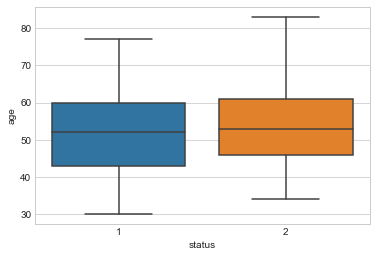

In [70]:
# Box plot age featue
sns.boxplot(x="status", y="age", data=habarman)
plt.show()

It shows the median by middle horizontal line
Box show the 25 percentile to 75 percentile values spead.
Below and above whiskers shows the min and max value.
Age in people belong to class 1 people is less than the class 1 people.

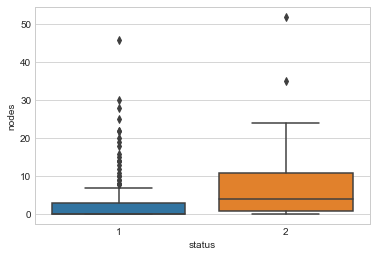

In [71]:
# Box plot with nodes features
sns.boxplot(x="status", y="nodes", data=habarman)
plt.show()

It show that in status 1 values are at the bottom.
Median is 0 of status one it shows that if nodes are less or zero then status is 1(He will live 5 years.).
Some values are spread very rarely.
If nodes are mode then status is 2 most of the time.

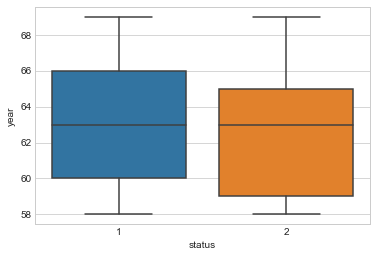

In [72]:
# Box plot with status feature
sns.boxplot(x="status", y="year", data=habarman)
plt.show()

Almost equal spread with respect to years.

### Violin plot

In [73]:
# Violin plot: It is a combination of box plot and PDF.
# Middle white dot represent the median.

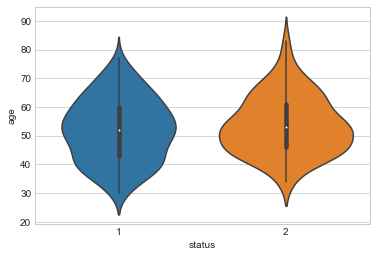

In [74]:
sns.violinplot(x="status", y="age", data= habarman, size= 8)
plt.show()

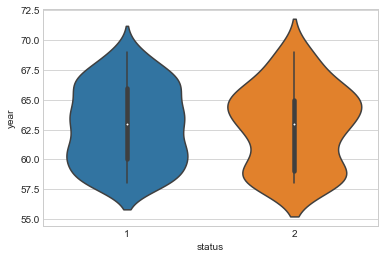

In [75]:
sns.violinplot(x= "status", y= "year", data= habarman, size= 8)
plt.show()

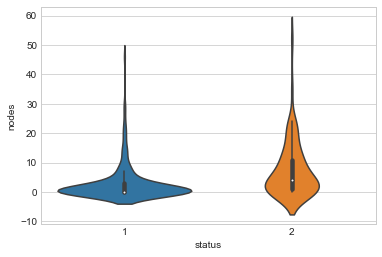

In [76]:
sns.violinplot(x="status", y="nodes", data= habarman, size= 8)
plt.show()

In [77]:
# In status 1 data is skewed towords 0.
# In status 1 data not follow Gaussian distribution.


**Observations:**
1. Given dataset there are 306 point and each have 4 features.
2. Objective is to find out the status of the patient from the given dataset. There are 2 status, 1 for patient live in 5 or more years and status 2 for patient deid in 5 years.
3. The given dataset is baised. There are 225 point of class one and 81 points of class two (73 % status 1 data and 26 % status 2 data).
4. There is no any feature useful to classify the status of the patient. Every graph with each feature and status are not separated they are overlap each other.
 
5. There is no pair feature to useful to classify the status of the patient. It is not possible to draw a line to separate the classes.
6. If the number of nodes count is less then they are in class 1. It shows that if the nodes are less then patient serviav chances are more. 
